# 베이즈 추론 명확하게 이해하기

아래 글을 읽고 [베이즈 추론](https://en.wikipedia.org/wiki/Bayesian_inference)의 핵심 개념을 명확하게 이해하기 위하여 이 노트북을 작성합니다. 인용한 글은 인용 구역으로 표시하였습니다.

* [How Bayesian inference works](https://brohrer.github.io/how_bayesian_inference_works.html) - Brandon Rohrer

## 측정 몸무게, 그리고 실제 몸무게

> On our last visit, we got three measurements before she became unmanageable: 13.9 lb, 17.5 lb and 14.1 lb. There is a standard statistical interpretation for this. We can calculate the mean, standard deviation and standard error for this set of numbers and create a distribution for Reign’s actual weight.

강아지의 **실제** 몸무게는 하나의 값을 가지겠지만 그 값의 크기가 얼마인지는 정확하게 알 수 없습니다. 다만 저울과 같은 도구를 사용하여 얻는 **측정** 몸무게 값들로부터 강아지의 **실제** 몸무게를 **추정**할 수 있을 뿐입니다.

* **추정**: 수학 통계에서, 어떤 모집단(母集團)으로부터 뽑아낸 표본을 바탕으로 하여 그 모집단의 평균ㆍ분산 따위를 헤아리는 일. - 출처: [네이버 사전](https://ko.dict.naver.com/#/entry/koko/d9a3220e1d414b46a7f0d8f5a7a19790)


**실제** 몸무게를 좀 더 정확하게 **추정**하기 위하여 다음과 같은 방법들을 사용하기도 합니다.

1. 여러 번 측정하고 측정값들의 평균을 구한다.
2. 여러 번 측정하고 대다수의 값과 너무 크게 차이나는 일부 값들을 버린 후 나머지 측정값들로 평균을 구한다.
3. 여러 번 측정하고 기존에 알고 있던 측정값과 가까운 측정값들에게는 높은 가중치를 부여하고 멀리 떨어져 있는 측정값들에게는 낮은 가중치를 부여하여 측정값들의 평균을 구한다.

## 측정 몸무게의 분포에 대한 전제

이제 이 글을 전개함에 있어서 바탕이 되는 하나의 전제를 아래와 같이 설정합니다.

* 강아지의 **실제** 몸무게가 `w_actual`일 때 **측정** 몸무게 값들의 확률분포는 정규분포를 따른다. 정규분포의 평균은 `w_actual`이고 표준편차는 저울의 성능과 강아지가 측정하는 동안 얼마나 조용히 있느냐에 따라 달라질 수 있다. 이 글에서는 논의를 단순화하기 위하여 표준편차를 항상 `1.0`으로 고정시킨다.

관찰이 가능한 결과가 생성되는 과정을 구체적으로 정의한 것을 모델이라고 부르며 모델의 모습을 결정하는데 필요한 항목들을 파라미터라고 합니다. 위의 전제를 모델과 파라미터라는 용어를 사용하여 다시 표현하면 아래와 같습니다.

* 모델: 강아지의 **실제** 몸무게가 `w_actual`일 때 **측정** 몸무게 값들의 확률분포는 정규분포를 따른다.
* 파라미터: 정규분포의 파라미터는 평균과 표준편차이다. 평균은 `w_actual`이고 표준편차는 저울의 성능과 강아지가 측정하는 동안 얼마나 조용히 있느냐에 따라 달라질 수 있다. 이 글에서는 논의를 단순화하기 위하여 표준편차를 항상 `1.0`으로 고정시킨다.

## 측정 몸무게로부터 실제 몸무게 추정

그렇다면 강아지의 **실제** 몸무게가 어떤 값일 때 세 번 측정하여 다음과 같은 **측정** 몸무게 값들을 얻을 가능성이 가장 높을까요?

* **측정** 몸무게: 13.9 lb, 17.5 lb and 14.1 lb

**실제** 몸무게를 다음 세 가지로 설정하고 각각에 대하여 **측정** 몸무게의 확률분포 그래프를 그려봄으로써 가능성의 차이를 시각적으로 비교해 볼 수 있습니다.

* 13.0 lb
* 14.5 lb
* 16.0 lb

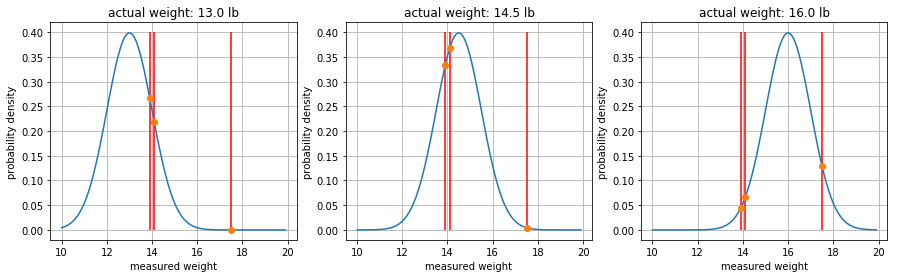

In [382]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

w_measured_arr = sorted([13.9, 17.5, 14.1])

def plot_measured_weight_probability_density(w_actual, s_actual, w_measured_arr):
    x = np.arange(10, 20, 0.1)
    y = stats.norm.pdf(x, w_actual, s_actual)
    
    p_measured = stats.norm.pdf(w_measured_arr, w_actual, s_actual)

    plt.plot(x, y)
    plt.plot(w_measured_arr, p_measured, 'o')
    plt.vlines(w_measured_arr, 0, 0.40, colors='r')
    plt.grid(True)
    plt.title(f'actual weight: {w_actual:.1f} lb')
    plt.xlabel('measured weight')
    plt.ylabel('probability density')

plt.figure(figsize = (15, 4))

# subplot-1
w_actual = 13.0
s_actual = 1.0

plt.subplot(131)
plot_measured_weight_probability_density(w_actual, s_actual, w_measured_arr)

# subplot-2
w_actual = 14.5

plt.subplot(132)
plot_measured_weight_probability_density(w_actual, s_actual, w_measured_arr)

# subplot-3
w_actual = 16.0

plt.subplot(133)
plot_measured_weight_probability_density(w_actual, s_actual, w_measured_arr)
    
plt.show()

위의 세 그래프 중에서 **실제** 몸무게가 14.5 lb인 경우 세 개의 **측정** 몸무게 값을 얻을 가능성이 가장 높아 보입니다. **측정** 몸무게의 분포 곡선이 확률밀도함수라는 점을 이용하여 **실제** 몸무게일 가능성을 수치로 나타내고 비교할 수 있습니다. 세 측정값에 해당하는 확률밀도를 모두 곱하여 얻는 값을 가능도(likelihood)라고 부르고 이 값의 크기를 서로 비교합니다.

actual weight = 13.0, likelihood = 9.265e-07
actual weight = 14.5, likelihood = 5.439e-04
actual weight = 16.0, likelihood = 3.738e-04


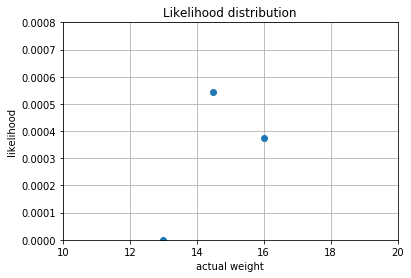

In [383]:
def get_likelihood(w_actual, s_actual, w_measured_arr):
    p_measured = stats.norm.pdf(w_measured_arr, w_actual, s_actual)
    likelihood = np.prod(p_measured)
    return likelihood

w_actual_arr = [13.0, 14.5, 16.0]
likelihood_arr = []

for w_actual in w_actual_arr:
    likelihood = get_likelihood(w_actual, s_actual, w_measured_arr)
    likelihood_arr.append(likelihood)
    print(f'actual weight = {w_actual:.1f}, likelihood = {likelihood:.3e}')
    
plt.plot(w_actual_arr, likelihood_arr, 'o')
plt.xlim(10, 20)
plt.ylim(0, 0.8e-3)
plt.grid(True)
plt.title('Likelihood distribution')
plt.xlabel('actual weight')
plt.ylabel('likelihood')
plt.show()

## Maximum Likelihood Estimation (MLE)

**실제** 몸무게로 추정하는 `w_actual` 값을 더 다양하게 설정하고 가능도분포 그래프를 그려봄으로써 **실제** 몸무게가 어떤 값을 가질 때 가능도가 최대가 되는지 시각적으로 파악할 수 있습니다.

Peak location: 15.2


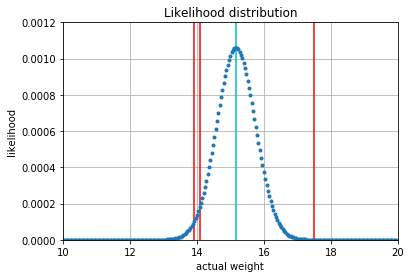

In [384]:
w_actual_arr = np.arange(10, 20, 0.04)
likelihood_arr = []

for w_actual in w_actual_arr:
    likelihood = get_likelihood(w_actual, s_actual, w_measured_arr)
    likelihood_arr.append(likelihood)

peak_location = w_actual_arr[np.argmax(likelihood_arr)]
print(f'Peak location: {peak_location:.1f}')

plt.plot(w_actual_arr, likelihood_arr, '.')
plt.xlim(10, 20)
plt.ylim(0, 0.12e-2)
plt.vlines(peak_location, 0, 0.12e-2, colors='c')
plt.vlines(w_measured_arr, 0, 0.12e-2, colors='r')
plt.grid(True)
plt.title('Likelihood distribution')
plt.xlabel('actual weight')
plt.ylabel('likelihood')
plt.show()

위 그래프의 하늘색 선은 **실제** 몸무게의 값이 15.2 lb인 경우이고 이 때 가능도 값은 최대가 됩니다. 따라서 MLE 방식을 사용하여 **추정**한 강아지의 **실제** 몸무게는 15.2 lb입니다.

## 측정 몸무게의 평균과 표준편차

가능도분포 함수를 평균과 표준편차 파라미터에 대하여 각각 편미분하고 극대값을 구하면 그 결과는 **측정** 몸무게의 평균과 표준편차의 값과 일치할 것입니다.

In [385]:
avg_measured = np.mean(w_measured_arr)
std_measured = np.std(w_measured_arr)

print(f'mean = {avg_measured:.1f}, standard deviation = {std_measured:.1f}')

mean = 15.2, standard deviation = 1.7


따라서 **측정** 몸무게의 평균값을 **실제** 몸무게라고 **추정**할 때 주어진 측정값들을 얻을 가능성이 가장 높아집니다. 표준편차의 값으로 임의로 고정시킨 1.0을 사용하기 보다 측정값들로부터 얻은 값을 사용하면 더 높은 가능도가 나옵니다.

In [386]:
w_actual = avg_measured
s_actual = std_measured
likelihood = np.prod(stats.norm.pdf(w_measured_arr, w_actual, s_actual))
print(f'actual weight = {w_actual:.1f}, likelihood = {likelihood:.2e}')

actual weight = 15.2, likelihood = 3.14e-03


지금까지의 과정은 **Maximum Likelihood Estimation** 라고 불리며 이 과정을 통해서 얻은 값을 **Maximum Likelihood Estimate (MLE)**이라고 합니다.

## 확률과 가능도

여러 글을 읽다 보면 확률과 가능도를 구분하지 않고 사용하는 경우를 종종 발견할 수 있습니다. 하지만 다음과 같이 확률과 가능도는 분명히 다른 의미를 가지고 있습니다.

* **측정** 몸무게는 측정 행위의 결과로 얻는 값이다. 확률은 관찰 가능한 사건이 어떤 빈도로 일어날 것인지를 다룬다.
* **측정** 몸무게의 값들로부터 이러한 값들을 생성할 가능성이 가장 높은 **실제** 몸무게를 **추정**한다. 이것은 관찰 가능한 사건으로부터 모델의 파라미터인 평균을 구하는 과정이고 그 중에서 가능성을 가장 높여 주는 평균을 선택한다. 가능성을 수치로 표현한 것이 **가능도**이다.
* **실제** 몸무게가 주어질 때 **측정** 몸무게의 확률분포를 말하고, **측정** 몸무게가 주어질 때 **실제** 몸무게의 가능도분포를 말한다.



## 사전 지식과 믿음

> In Reign’s case I do have additional information. I know that the last time I came to the vet she weighed in at 14.2 pounds. I also know that she doesn't feel noticeably heavier or lighter to me, although my arm is not a very sensitive scale. Because of this, I believe that she's about 14.2 pounds but might be a pound or two higher or lower. To represent this, I use a normal distribution with a peak at 14.2 pounds and with a standard deviation of a half pound.

위의 인용글로부터 사전 지식과 믿음을 추출하면 아래와 같습니다.

* 사전 지식: 이전에 수의사를 방문하였을 때 강아지의 **측정** 몸무게를 얻고 이를 토대로 **추정**한 **실제** 몸무게는 14.2 파운드였습니다. 수십 번 측정하여 평균을 낸 값일 수도 있고 강아지를 움직이지 못하도록 한 상태에서 한 번 측정한 값일 수도 있습니다. 
* 믿음: 강아지를 팔로 안았을 때의 느낌으로는 그동안 **실제** 몸무게가 크게 변하지는 않은 듯합니다. 1 파운드나 2 파운드 정도의 차이는 있을 수 있습니다. 믿음의 정도를 수치화한다면 14.2 파운드를 평균으로 하고 0.5 파운드를 표준편차로 하는 정규분포입니다.

여기서는 믿음의 정도를 정규분포로 수치화하였지만 다른 형태의 분포로 수치화하는 것도 얼마든지 가능합니다. 특히 새롭게 얻은 사전 지식이 있다면 이를 적절히 수치화하여 믿음의 정도에 반영할 수 있습니다. 

이러한 사전 지식과 믿음을 고려하면 이번 방문에서 얻은 **측정** 몸무게 중에서 17.5 파운드는 유효한 값이 아닐 가능성이 높습니다. 이 문제를 다루기 위하여 다음 두 가지 방법을 고려할 수 있습니다.

1. 17.5 파운드를 버리고 나머지 두 개의 측정값에 대하여 평균을 구한다.
2. 17.5 파운드를 버리기 보다는 낮은 가중치를 적용하고 이전의 몸무게와 비슷한 값들에 대해서는 높은 가중치를 적용하여 평균을 구한다.

아래 그래프는 강아지의 몸무게에 대해 얻은 사전 지식을 토대로 형성하게 된 **실제** 몸무게의 분포에 대한 믿음의 정도를 수치화한 것입니다. 이것은 **실제** 몸무게가 주어질 때 **측정** 몸무게의 확률분포를 나타내는 모델과는 무관합니다.  

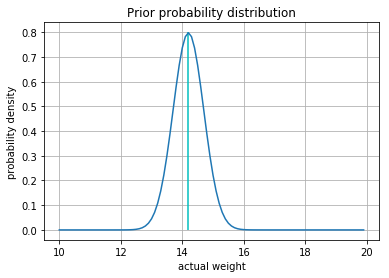

In [387]:
w_prior = 14.2
s_prior = 0.5

x = np.arange(10, 20, 0.1)
p_prior = stats.norm.pdf(x, w_prior, s_prior)

plt.plot(x, p_prior)
plt.vlines(w_prior, 0, 0.8, colors='c')
plt.grid(True)
plt.title('Prior probability distribution')
plt.xlabel('actual weight')
plt.ylabel('probability density')
plt.show()

## 믿음의 정도를 가중치로 활용

강아지의 **실제** 몸무게에 대한 가능도를 계산할 때 **실제** 몸무게에 대한 믿음의 정도를 가중치로 활용할 수 있습니다.

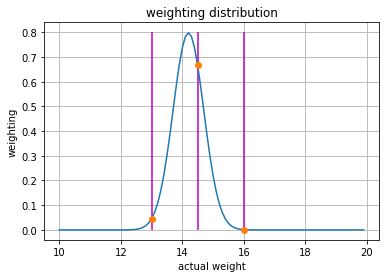

In [388]:
w_actual_arr = [13.0, 14.5, 16.0]
weightings = stats.norm.pdf(w_actual_arr, w_prior, s_prior)

plt.plot(x, p_prior)
plt.plot(w_actual_arr, weightings, 'o')
plt.vlines(w_actual_arr, 0, 0.8, colors='m')
plt.title('weighting distribution')
plt.xlabel('actual weight')
plt.ylabel('weighting')
plt.grid(True)
plt.show()

이제 **실제** 몸무게와 관련하여 다음 세 가지는 같은 것을 지칭한다고 말할 수 있습니다.

* Prior probability distribution
* Belief distribution
* Weighting distribution

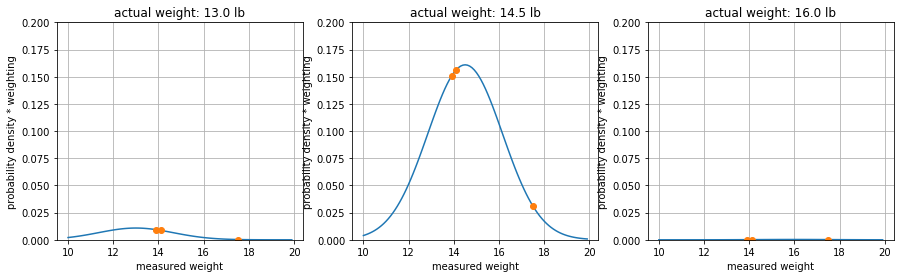

In [389]:
def plot_measured_weight_probability_density_with_weighting(w_actual, s_actual, weighting, w_measured_arr):
    x = np.arange(10, 20, 0.1)
    y = stats.norm.pdf(x, w_actual, s_actual)

    p_distribution = stats.norm.pdf(x, w_actual, s_actual)
    p_measured = stats.norm.pdf(w_measured_arr, w_actual, s_actual)

    plt.plot(x, p_distribution * weighting)
    plt.plot(w_measured_arr, p_measured * weighting, 'o')
    plt.grid(True)
    plt.title(f'actual weight: {w_actual:.1f} lb')
    plt.xlabel('measured weight')
    plt.ylabel('probability density * weighting')
    plt.ylim(0, 0.2)
    
plt.figure(figsize = (15, 4))

# subplot-1
w_actual = w_actual_arr[0]
weighting = weightings[0]

plt.subplot(131)
plot_measured_weight_probability_density_with_weighting(w_actual, s_actual, weighting, w_measured_arr)

# subplot-2
w_actual = w_actual_arr[1]
weighting = weightings[1]

plt.subplot(132)
plot_measured_weight_probability_density_with_weighting(w_actual, s_actual, weighting, w_measured_arr)

# subplot-3
w_actual = w_actual_arr[2]
weighting = weightings[2]

plt.subplot(133)
plot_measured_weight_probability_density_with_weighting(w_actual, s_actual, weighting, w_measured_arr)

plt.show()

**실제** 몸무게로 **추정**하는 값이 13.0, 14.5, 16.0 lb일 때 가능도에 가중치를 적용하여 모두 곱합으로써 사후 확률값을 계산하고 이를 그래프로 그려서 시각적으로 비교해 봅니다.

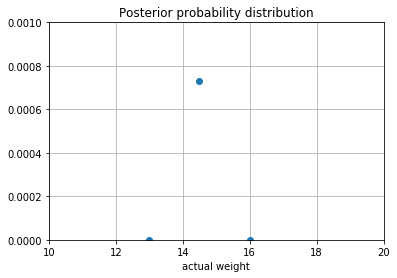

In [392]:
def get_posteriori(w_prior, s_prior, w_actual, s_actual, w_measured_arr):
    l_measured = stats.norm.pdf(w_measured_arr, w_actual, s_actual)
    weighting = stats.norm.pdf(w_actual, w_prior, s_prior)
    posteriori = np.prod(l_measured * weighting)
    return posteriori

w_actual_arr = [13.0, 14.5, 16.0]
posteriori_arr = []
    
for w_actual in w_actual_arr:
    posteriori = get_posteriori(w_prior, s_prior, w_actual, s_actual, w_measured_arr)
    posteriori_arr.append(posteriori)

plt.plot(w_actual_arr, posteriori_arr, 'o')
plt.xlim(10, 20)
plt.ylim(0, 0.1e-2)
plt.grid(True)
plt.title('Posterior probability distribution')
plt.xlabel('actual weight')
plt.show()

## Maximum A Posteriori (MAP)

**실제** 몸무게의 값을 더 다양하게 설정하고 사후확률 값의 분포를 그래프로 그려봅니다. 그러면 **실제** 몸무게가 어떤 값을 가질 때 사후확률값이 최대가 되는지 시각적으로 파악할 수 있습니다.

Peak location: 14.3


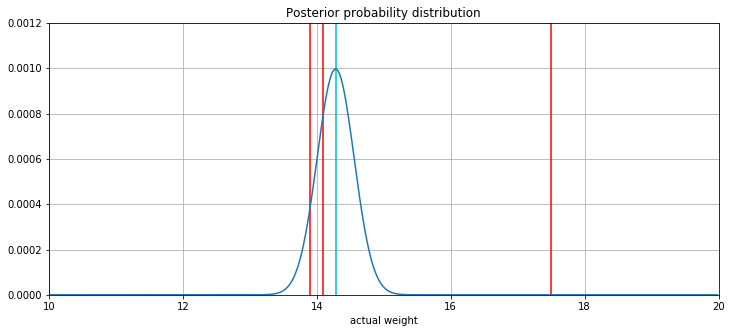

In [397]:
w_actual_arr = np.arange(10, 20, 0.02)
posteriori_arr = []
    
for w_actual in w_actual_arr:
    posteriori = get_posteriori(w_prior, s_prior, w_actual, s_actual, w_measured_arr)
    posteriori_arr.append(posteriori)

peak_location = w_actual_arr[np.argmax(posteriori_arr)]
print(f'Peak location: {peak_location:.1f}')

plt.figure(figsize = (12, 5))
plt.plot(w_actual_arr, posteriori_arr, label='posterior')
plt.vlines(w_measured_arr, 0, 0.12e-2, colors='r')
plt.xlim(10, 20)
plt.ylim(0, 0.12e-2)
plt.vlines(peak_location, 0, 0.12e-2, colors='c')
plt.grid(True)
plt.title('Posterior probability distribution')
plt.xlabel('actual weight')
plt.show()

위 그래프의 하늘색 선은 **실제** 몸무게의 값이 14.3 파운드인 경우이고 이 때 사후확률 값은 최대가 됩니다. 따라서 MAP 방식으로 **추정**한 강아지의 **실제** 몸무게는 14.3 파운드입니다.

## 정리

MLE는 MAP에서 `weighting` 값을 1로 준 경우에 해당합니다. 이것은 사전 지식을 고려하지 않기 때문에 **실제** 몸무게가 동일한 가능성으로 모든 값을 가질 수 있음을 나타냅니다. 따라서 MLE는 MAP의 특수한 경우라고 말할 수 있습니다. 

* 강아지의 측정 몸무게: 13.9 lb, 17.5 lb and 14.1 lb (평균값은 15.2 lb)

사전 지식이 없다면 MLE 방식을 사용하여 강아지의 **실제** 몸무게를 **추정**합니다. 

* MLE 방식으로 강아지의 실제 몸무게 추정: 15.2 lb

사전 지식을 가지고 있다면 이를 기반으로 하는 믿음을 수치화하고 MAP 방식을 사용하여 강아지의 **실제** 몸무게를 **추정**할 수 있습니다.

* 강아지의 몸무게에 대한 사전 지식: 14.2 lb
* 사전 지식에 기반한 믿음: **실제** 몸무게의 확률 분포는 평균이 14.2 파운드이고 표준편차가 0.5인 정규분포를 따른다.
* MAP 방식으로 강아지의 **실제** 몸무게 **추정**: 14.3 lb

## 더 읽을 거리

* [Probability concepts explained: Maximum likelihood estimation](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1) - Jonny Brooks-Bartlett
* [Probability concepts explained: Bayesian inference for parameter estimation.](https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348) - Jonny Brooks-Bartlett